In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from my_modules import risk
from my_modules import data
from my_modules import portfolio
from my_modules import index
from my_modules import model

import numpy as np
import pandas as pd

In [3]:
import ipywidgets as widgets

In [7]:
from IPython.display import display

## GBM Interactive Plots 

In [14]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of the GBM model
    """
    s_0=100
    prices = model.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma)
    ax = prices.plot(legend=False, color='indianred', alpha=0.5, linewidth=2, figsize=(12,6))
    ax.axhline(y=s_0, ls=':', color='black')
    ax.set_ylim(top=400)
    # Draw a dot at the origin
    ax.plot(0,s_0, marker='o', color='darkred',alpha=0.2)

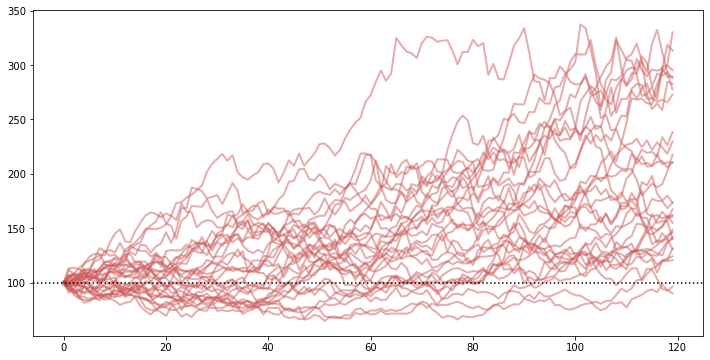

In [9]:
show_gbm(30,0.07,0.15)

In [15]:
gbm_control = widgets.interactive(show_gbm, 
                                  n_scenarios =(1,20,1), #trupel, min, max, and step
                                  mu=(-0.2,0.2,0.01),
                                  sigma=(0, 0.3, 0.01))

In [16]:
display(gbm_control)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Now applying display to CPPI

In [37]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = model.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = portfolio.cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start_value=start, floor=floor)
    wealth = btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)

cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .30, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…